<a href="https://colab.research.google.com/github/kushal8112/Portfolio_optimization/blob/main/mean_variance_portfolio(testing%20phase).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%%**********************]  1 of 1 completed
Enter the number of stocks1
Enter the asset nameNTPC.NS
[*********************100%%**********************]  1 of 1 completed

Maximum Sharpe Ratio
--------------------------------------------------------------------------------
 Returns: [15.40513425 15.40513425 15.40513425 ... 15.40513425 15.40513425
 15.40513425] 
 Risk: [19.66597285 19.66597285 19.66597285 ... 19.66597285 19.66597285
 19.66597285] 
 Sharpe Ratio: [0.78333955 0.78333955 0.78333955 ... 0.78333955 0.78333955 0.78333955] 
 Weights: [[[1.]
  [1.]
  [1.]
  ...
  [1.]
  [1.]
  [1.]]]
--------------------------------------------------------------------------------

Minimum Portfolio Variance
--------------------------------------------------------------------------------
 Returns: [15.40513425 15.40513425 15.40513425 ... 15.40513425 15.40513425
 15.40513425] 
 Risk: [19.66597285 19.66597285 19.66597285 ... 19.66597285 19.66597285
 19.66597285] 
 Sharpe Rat

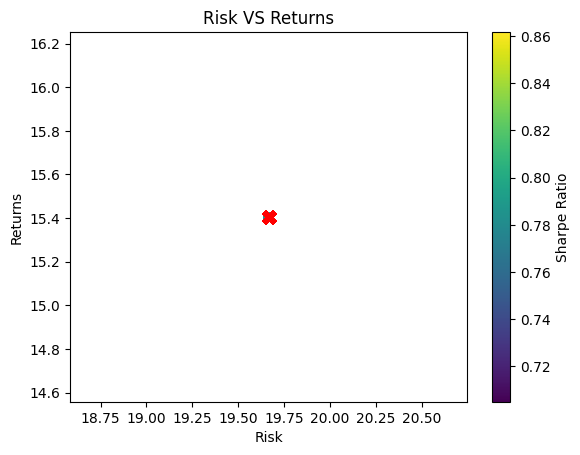

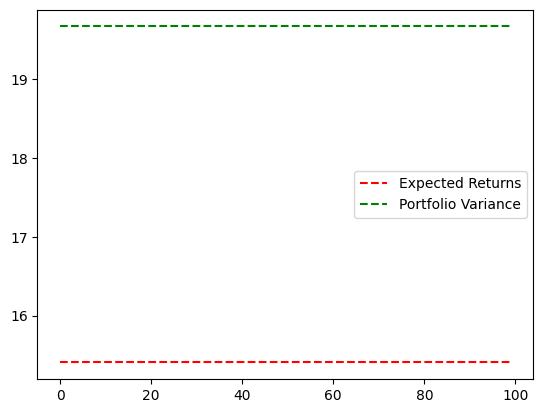

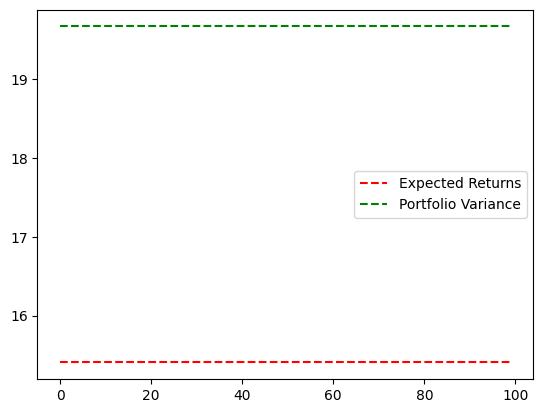

Optimized Portfolio
------------------------------------------------------------
Optimized Weights :  [1.] 
 Expected returns :  15.405134251383943 
 Portfolio Variance :  [19.66597285] 
 Sharpe Ratio :  [0.78333955]
------------------------------------------------------------


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Importing Data
sd = "2021-01-14"
ed = "2022-12-22"
def stock(a):
  data = yf.download(f"{a}",start=sd , end=ed)
  close = data['Close']
  return close
y = np.shape(stock("RELIANCE.NS"))

#Enter the no.of assets and assets
n = input("Enter the number of stocks")
n=int(n)
d = np.ones((y[0],n))
for i in range(n):
  st = input("Enter the asset name")
  d[:,i] = stock(st)

#Daily return rate calculation
number_of_stocks = n
df = pd.DataFrame(d)
drt = (df.pct_change(1)*100).dropna()
daily_return = np.array(drt)

#Mean and standard deviation calculation
mean_total = daily_return.mean(axis=0)
std_total = daily_return.std(axis=0)

#Variance Covariance Matrix
var = np.cov((daily_return - mean_total).T)/np.dot(std_total.reshape(n,1),std_total.reshape(1,n))

#Weights calculation
weights = np.random.random(number_of_stocks)
weights = weights/np.sum(weights)

#Expected returns, Portfolio variance and Sharpe ratio
t = 130
expected_returns = np.sum((weights*mean_total)*t)
portfolio_variance = np.sqrt(np.dot(np.dot(weights*std_total,var),(weights*std_total).reshape(n,1))*t)
sharpe_ratio = expected_returns/portfolio_variance

#Monte Carlo simulation
number_of_portfolios = 5000
nweights = np.ones((number_of_portfolios,number_of_stocks))
nexpected_returns = np.ones(number_of_portfolios)
nportfolio_variance = np.ones(number_of_portfolios)
nsharpe_ratio = np.ones(number_of_portfolios)
for i in range(number_of_portfolios):
  nweights[i,:] = np.random.random(number_of_stocks)
  nweights[i,:] = nweights[i,:]/np.sum(nweights[i,:])
  nexpected_returns[i] = np.sum((nweights[i,:]*mean_total)*t)
  nportfolio_variance[i] = np.sqrt(np.dot(np.dot(nweights[i,:]*std_total,var),(nweights[i,:]*std_total).reshape(n,1))*t)
  nsharpe_ratio[i] = nexpected_returns[i]/nportfolio_variance[i]
max_sharpe = np.where(nsharpe_ratio == np.max(nsharpe_ratio))
min_var = np.where(nportfolio_variance == np.min(nportfolio_variance))
max_return = np.where(nexpected_returns == np.max(nexpected_returns))

#Printing Result
print("")
print("="*80)
print("Maximum Sharpe Ratio")
print("-"*80)
print(" Returns:",nexpected_returns[max_sharpe],
      "\n Risk:",nportfolio_variance[max_sharpe],
      "\n Sharpe Ratio:",nsharpe_ratio[max_sharpe],
      "\n Weights:",nweights[max_sharpe,:])
print("-"*80)

print("")
print("="*80)
print("Minimum Portfolio Variance")
print("-"*80)
print(" Returns:",nexpected_returns[min_var],
      "\n Risk:",nportfolio_variance[min_var],
      "\n Sharpe Ratio:",nsharpe_ratio[min_var],
      "\n Weights:",nweights[min_var,:])
print("-"*80)

print("")
print("="*80)
print("Maximum Returns")
print("-"*80)
print(" Returns:",nexpected_returns[max_return],
      "\n Risk:",nportfolio_variance[max_return],
      "\n Sharpe Ratio:",nsharpe_ratio[max_return],
      "\n Weights:",nweights[max_return,:])
print("-"*80)

#Plotting the efficient frontier
plt.scatter(x=nportfolio_variance,
            y=nexpected_returns,
            c=nsharpe_ratio)
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.title("Risk VS Returns")
plt.colorbar(label="Sharpe Ratio")
plt.scatter(x=nportfolio_variance[max_sharpe],y=nexpected_returns[max_sharpe],marker="X",color="r",s=75)
plt.show()

#Checking for the Expected returns and Portfolio variance curves
h=100
sexpected_returns = np.sort(nexpected_returns)
sportfolio_variance = np.ones(h)
k=0
dexpected_returns = np.ones(h)
for i in ((np.rint(np.linspace(1,number_of_portfolios - 1,h))).astype(int)):
  j = np.where(nexpected_returns == sexpected_returns[i])
  j=j[0][0]
  sportfolio_variance[k] = nportfolio_variance[j]
  dexpected_returns[k] = nexpected_returns[j]
  k=k+1
plt.plot(dexpected_returns,"r--",label="Expected Returns")
plt.plot(sportfolio_variance,"g--",label="Portfolio Variance")
plt.legend()
plt.show()

h=100
sexpected_returns = np.sort(nportfolio_variance)
sportfolio_variance = np.ones(h)
k=0
dexpected_returns = np.ones(h)
for i in ((np.rint(np.linspace(1,number_of_portfolios - 1,h))).astype(int)):
  j = np.where(nportfolio_variance == sexpected_returns[i])
  j=j[0][0]
  sportfolio_variance[k] = nportfolio_variance[j]
  dexpected_returns[k] = nexpected_returns[j]
  k=k+1
plt.plot(dexpected_returns,"r--",label="Expected Returns")
plt.plot(sportfolio_variance,"g--",label="Portfolio Variance")
plt.legend()
plt.show()

#Optimization using Scipy
def neg_sharpe_ratio(weights):
  return -(np.sum((weights*mean_total)*t)/(np.sqrt(np.dot(np.dot(weights*std_total,var),(weights*std_total).reshape(n,1))*t)))

constraints = {'type':'eq','fun':lambda weights: np.sum(weights) - 1}
bounds = [(0,1)for _ in range(n)]
initial_weights = np.array([1/n]*n)

optimized_portfolio = minimize(neg_sharpe_ratio , initial_weights , method = 'SLSQP', constraints = constraints , bounds = bounds)
optimized_weights = optimized_portfolio.x

print("="*60)
print("Optimized Portfolio")
print("-"*60)
print("Optimized Weights : ",optimized_weights ,
      "\n Expected returns : ",np.sum(optimized_weights*mean_total*t) ,
      "\n Portfolio Variance : ",(np.sqrt(np.dot(np.dot(optimized_weights*std_total,var),(optimized_weights*std_total).reshape(n,1))*t)) ,
      "\n Sharpe Ratio : ", (-1)*neg_sharpe_ratio(optimized_weights))
print("-"*60)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<ipython-input-13-dd1f6ee2c51e>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nportfolio_variance[i] = np.sqrt(np.dot(np.dot(nweights[i,:]*std_total,var),(nweights[i,:]*std_total).reshape(n,1))*t)



 Daily return:
  [[-6.05056052e-01 -3.72849322e+00 -1.79798598e-01]
 [-1.64531970e-01  1.98610100e+00  2.35554751e-01]
 [ 1.63975682e+00  1.80135877e+00  6.49692907e-01]
 [-2.59416660e-01  1.07604081e+01  7.55392692e+00]
 [-1.62729930e-02 -5.82902196e+00  4.95466802e+00]
 [ 8.94289657e-02 -4.12648266e-01 -1.70336795e+00]
 [ 6.74144862e-01 -1.15101934e+00 -1.02736995e+00]
 [-1.19403358e+00 -1.86300929e-01 -5.75284485e-01]
 [-4.08222137e-02  1.35324410e+00 -6.28926660e-01]
 [-3.02246859e-01 -3.68324208e+00  1.39233879e-01]
 [-1.45021149e+00 -1.72084442e+00 -2.51548022e+00]
 [ 9.56089861e-01  6.80932032e-01 -6.09432223e-01]
 [-5.76447279e-01 -2.31883879e+00  1.83951538e+00]
 [-1.49100943e-01  1.18694581e+00  6.41814169e+00]
 [-2.65452540e-01 -2.73704671e+00  0.00000000e+00]
 [ 3.52656047e+00 -1.50755632e-01 -2.01034822e+00]
 [-6.50748416e-01 -5.48565885e+00 -2.94842338e-01]
 [ 5.01373152e-01  1.27795764e+00 -4.55890136e+00]
 [-1.02993211e+00 -1.57728663e+00  8.00414013e-01]
 [-1.47154405

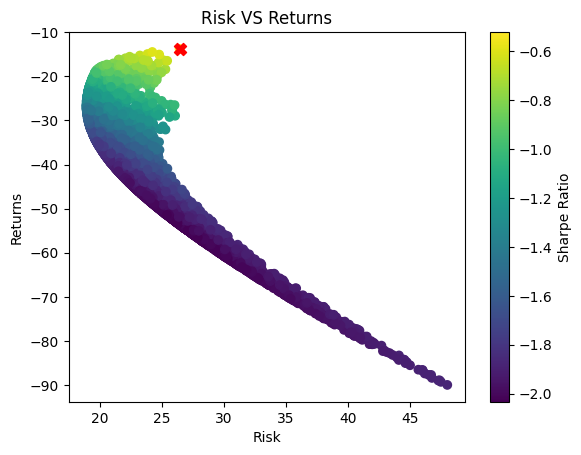

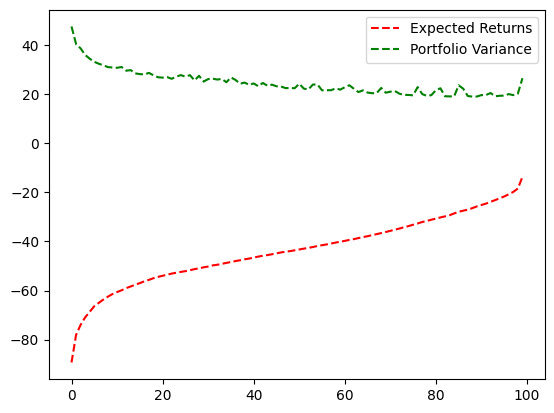

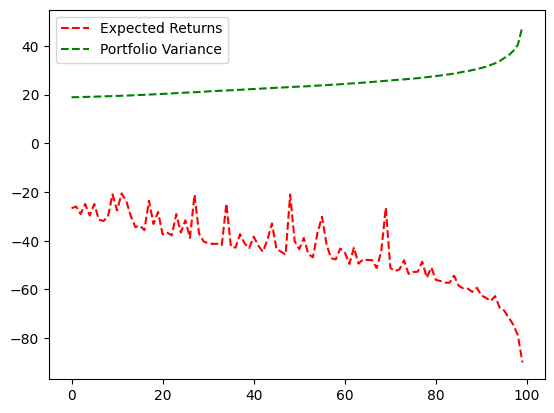

Optimized Portfolio
------------------------------------------------------------
Optimized Weights :  [1.0000000e+00 0.0000000e+00 1.2490009e-13] 
 Expected returns :  -12.646631478780664 
 Portfolio Variance :  [27.01971252] 
 Sharpe Ratio :  [-0.46805204]
------------------------------------------------------------


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Importing Data
sd = "2018-01-01"
ed = "2019-01-01"
def stock(a):
  data = yf.download(f"{a}",start=sd , end=ed)
  close = data['Adj Close']
  return close
y = np.shape(stock("CIPLA.NS"))

#Enter the no.of assets and assets
n = 3
d = [stock("CIPLA.NS"),stock("IDEA.NS"),stock("WONDERLA.NS")]
d = pd.DataFrame(d)
d = d.transpose()

#Daily return rate calculation
number_of_stocks = n
df = pd.DataFrame(d)
drt = (df.pct_change(1)*100).dropna()
daily_return = np.array(drt)
print("\n Daily return:\n ",daily_return)

#Mean and standard deviation calculation
mean_total = daily_return.mean(axis=0)
std_total = daily_return.std(axis=0)

#Variance Covariance Matrix
var = np.cov((daily_return - mean_total).T)/np.dot(std_total.reshape(n,1),std_total.reshape(1,n))
print(var)

#Weights calculation
weights = np.random.random(number_of_stocks)
weights = weights/np.sum(weights)

#Expected returns, Portfolio variance and Sharpe ratio
t = 252
expected_returns = np.sum((weights*mean_total)*t)
portfolio_variance = np.sqrt(np.dot(np.dot(weights*std_total,var),(weights*std_total).reshape(n,1))*t)
sharpe_ratio = expected_returns/portfolio_variance

#Monte Carlo simulation
number_of_portfolios = 5000
nweights = np.ones((number_of_portfolios,number_of_stocks))
nexpected_returns = np.ones(number_of_portfolios)
nportfolio_variance = np.ones(number_of_portfolios)
nsharpe_ratio = np.ones(number_of_portfolios)
for i in range(number_of_portfolios):
  nweights[i,:] = np.random.random(number_of_stocks)
  nweights[i,:] = nweights[i,:]/np.sum(nweights[i,:])
  nexpected_returns[i] = np.sum((nweights[i,:]*mean_total)*t)
  nportfolio_variance[i] = np.sqrt(np.dot(np.dot(nweights[i,:]*std_total,var),(nweights[i,:]*std_total).reshape(n,1))*t)
  nsharpe_ratio[i] = nexpected_returns[i]/nportfolio_variance[i]
max_sharpe = np.where(nsharpe_ratio == np.max(nsharpe_ratio))
min_var = np.where(nportfolio_variance == np.min(nportfolio_variance))
max_return = np.where(nexpected_returns == np.max(nexpected_returns))

#Printing Result
print("")
print("="*80)
print("Maximum Sharpe Ratio")
print("-"*80)
print(" Returns:",nexpected_returns[max_sharpe],
      "\n Risk:",nportfolio_variance[max_sharpe],
      "\n Sharpe Ratio:",nsharpe_ratio[max_sharpe],
      "\n Weights:",nweights[max_sharpe,:])
print("-"*80)

print("")
print("="*80)
print("Minimum Portfolio Variance")
print("-"*80)
print(" Returns:",nexpected_returns[min_var],
      "\n Risk:",nportfolio_variance[min_var],
      "\n Sharpe Ratio:",nsharpe_ratio[min_var],
      "\n Weights:",nweights[min_var,:])
print("-"*80)

print("")
print("="*80)
print("Maximum Returns")
print("-"*80)
print(" Returns:",nexpected_returns[max_return],
      "\n Risk:",nportfolio_variance[max_return],
      "\n Sharpe Ratio:",nsharpe_ratio[max_return],
      "\n Weights:",nweights[max_return,:])
print("-"*80)

#Plotting the efficient frontier
plt.scatter(x=nportfolio_variance,
            y=nexpected_returns,
            c=nsharpe_ratio)
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.title("Risk VS Returns")
plt.colorbar(label="Sharpe Ratio")
plt.scatter(x=nportfolio_variance[max_sharpe],y=nexpected_returns[max_sharpe],marker="X",color="r",s=75)
plt.show()

#Checking for the Expected returns and Portfolio variance curves
h=100
sexpected_returns = np.sort(nexpected_returns)
sportfolio_variance = np.ones(h)
k=0
dexpected_returns = np.ones(h)
for i in ((np.rint(np.linspace(1,number_of_portfolios - 1,h))).astype(int)):
  j = np.where(nexpected_returns == sexpected_returns[i])
  j=j[0][0]
  sportfolio_variance[k] = nportfolio_variance[j]
  dexpected_returns[k] = nexpected_returns[j]
  k=k+1
plt.plot(dexpected_returns,"r--",label="Expected Returns")
plt.plot(sportfolio_variance,"g--",label="Portfolio Variance")
plt.legend()
plt.show()

h=100
sexpected_returns = np.sort(nportfolio_variance)
sportfolio_variance = np.ones(h)
k=0
dexpected_returns = np.ones(h)
for i in ((np.rint(np.linspace(1,number_of_portfolios - 1,h))).astype(int)):
  j = np.where(nportfolio_variance == sexpected_returns[i])
  j=j[0][0]
  sportfolio_variance[k] = nportfolio_variance[j]
  dexpected_returns[k] = nexpected_returns[j]
  k=k+1
plt.plot(dexpected_returns,"r--",label="Expected Returns")
plt.plot(sportfolio_variance,"g--",label="Portfolio Variance")
plt.legend()
plt.show()

#Optimization using Scipy
def neg_sharpe_ratio(weights):
  return -(np.sum((weights*mean_total)*t)/(np.sqrt(np.dot(np.dot(weights*std_total,var),(weights*std_total).reshape(n,1))*t)))

constraints = {'type':'eq','fun':lambda weights: np.sum(weights) - 1}
bounds = [(0,1)for _ in range(n)]
initial_weights = np.array([1/n]*n)

optimized_portfolio = minimize(neg_sharpe_ratio , initial_weights , method = 'SLSQP', constraints = constraints , bounds = bounds)
optimized_weights = optimized_portfolio.x

print("="*60)
print("Optimized Portfolio")
print("-"*60)
print("Optimized Weights : ",optimized_weights ,
      "\n Expected returns : ",np.sum(optimized_weights*mean_total*t) ,
      "\n Portfolio Variance : ",(np.sqrt(np.dot(np.dot(optimized_weights*std_total,var),(optimized_weights*std_total).reshape(n,1))*t)) ,
      "\n Sharpe Ratio : ", (-1)*neg_sharpe_ratio(optimized_weights))
print("-"*60)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<ipython-input-1-c6d8c8edb58f>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nportfolio_variance[i] = np.sqrt(np.dot(np.dot(nweights[i,:],var),(nweights[i,:]).reshape(n,1))*t)



Maximum Sharpe Ratio
--------------------------------------------------------------------------------
 Returns: [-4.44367976] 
 Risk: [24.88693827] 
 Sharpe Ratio: [-0.1785547] 
 Weights: [[[9.92068664e-01 4.27307864e-04 7.50402847e-03]]]
--------------------------------------------------------------------------------

Minimum Portfolio Variance
--------------------------------------------------------------------------------
 Returns: [-9.77851234] 
 Risk: [17.70279307] 
 Sharpe Ratio: [-0.55237116] 
 Weights: [[[0.44171924 0.08404797 0.47423279]]]
--------------------------------------------------------------------------------

Maximum Returns
--------------------------------------------------------------------------------
 Returns: [-4.44367976] 
 Risk: [24.88693827] 
 Sharpe Ratio: [-0.1785547] 
 Weights: [[[9.92068664e-01 4.27307864e-04 7.50402847e-03]]]
--------------------------------------------------------------------------------


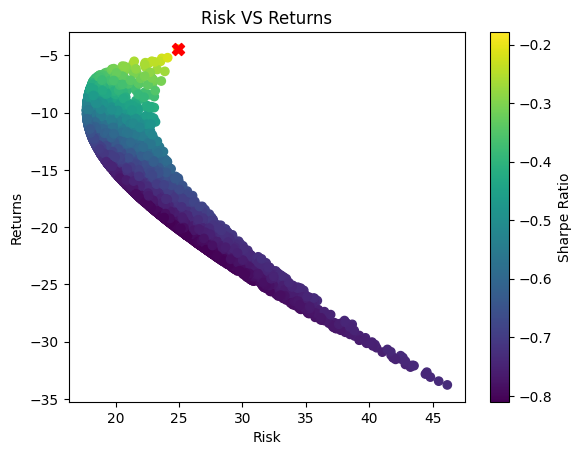

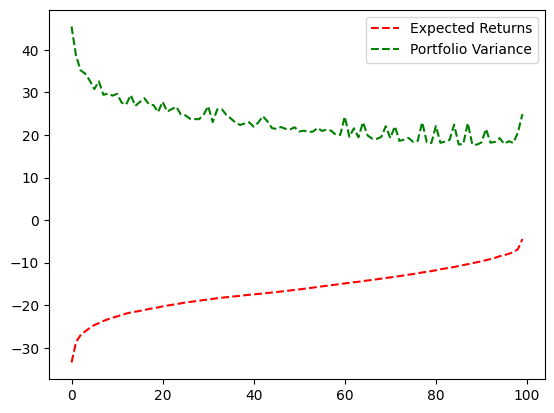

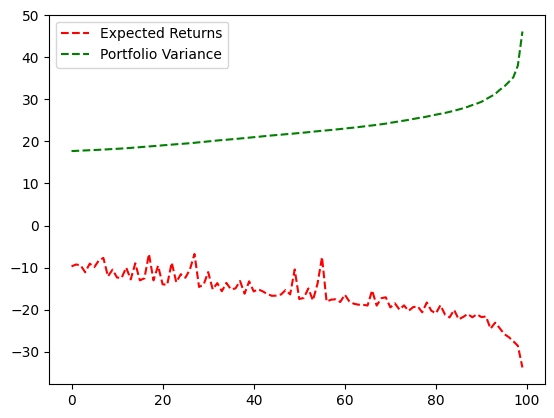

[*********************100%%**********************]  1 of 1 completed

Optimized Portfolio
------------------------------------------------------------
Optimized Weights :  [1.00000000e+00 0.00000000e+00 1.37390099e-15] 
 Expected returns :  -4.385342334448481 
 Portfolio Variance :  [39.55398059] 
 Sharpe Ratio :  [-0.17494891]
------------------------------------------------------------



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Maximum Sharpe Ratio
--------------------------------------------------------------------------------
 Returns: -4.443679760528096 
 Risk: 24.886938272310363 
 Sharpe Ratio: -0.17855469852923656 
 Weights: [9.92068664e-01 4.27307864e-04 7.50402847e-03]
--------------------------------------------------------------------------------

 Actual Returns was: -8.612890996623875 
 The Actual portfolio variance was: 1.4280917482264803 
 Actual Sharpe ratio: -6.031048780528323
--------------------------------------------------------------------------------


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
from scipy.optimize import minimize

#Importing Data
sd = "2016-01-01"
ed = "2019-01-01"
def stock(a):
  data = yf.download(f"{a}",start=sd , end=ed)
  close = data['Adj Close']
  return close
y = np.shape(stock("CIPLA.NS"))

#Enter the no.of assets and assets
n = 3
d = [stock("CIPLA.NS"),stock("IDEA.NS"),stock("WONDERLA.NS")]
d = pd.DataFrame(d)
d = d.transpose()

#Daily return rate calculation
number_of_stocks = n
df = pd.DataFrame(d)
drt = (df.pct_change(1)*100).dropna()
daily_return = np.array(drt)

#Mean and standard deviation calculation
mean_total = daily_return.mean(axis=0)
std_total = daily_return.std(axis=0)

#Variance Covariance Matrix
var = np.cov((daily_return - mean_total).T)

#Weights calculation
weights = np.random.random(number_of_stocks)
weights = weights/np.sum(weights)

#Expected returns, Portfolio variance and Sharpe ratio
t = 252
expected_returns = np.sum((weights*mean_total)*t)
portfolio_variance = np.sqrt(np.dot(np.dot(weights,var),(weights).reshape(n,1))*t)
sharpe_ratio = expected_returns/portfolio_variance

#Monte Carlo simulation
number_of_portfolios = 5000
nweights = np.ones((number_of_portfolios,number_of_stocks))
nexpected_returns = np.ones(number_of_portfolios)
nportfolio_variance = np.ones(number_of_portfolios)
nsharpe_ratio = np.ones(number_of_portfolios)
for i in range(number_of_portfolios):
  nweights[i,:] = np.random.random(number_of_stocks)
  nweights[i,:] = nweights[i,:]/np.sum(nweights[i,:])
  nexpected_returns[i] = np.sum((nweights[i,:]*mean_total)*t)
  nportfolio_variance[i] = np.sqrt(np.dot(np.dot(nweights[i,:],var),(nweights[i,:]).reshape(n,1))*t)
  nsharpe_ratio[i] = nexpected_returns[i]/nportfolio_variance[i]
max_sharpe = np.where(nsharpe_ratio == np.max(nsharpe_ratio))
min_var = np.where(nportfolio_variance == np.min(nportfolio_variance))
max_return = np.where(nexpected_returns == np.max(nexpected_returns))

#Printing Result
print("")
print("="*80)
print("Maximum Sharpe Ratio")
print("-"*80)
print(" Returns:",nexpected_returns[max_sharpe],
      "\n Risk:",nportfolio_variance[max_sharpe],
      "\n Sharpe Ratio:",nsharpe_ratio[max_sharpe],
      "\n Weights:",nweights[max_sharpe,:])
print("-"*80)

print("")
print("="*80)
print("Minimum Portfolio Variance")
print("-"*80)
print(" Returns:",nexpected_returns[min_var],
      "\n Risk:",nportfolio_variance[min_var],
      "\n Sharpe Ratio:",nsharpe_ratio[min_var],
      "\n Weights:",nweights[min_var,:])
print("-"*80)

print("")
print("="*80)
print("Maximum Returns")
print("-"*80)
print(" Returns:",nexpected_returns[max_return],
      "\n Risk:",nportfolio_variance[max_return],
      "\n Sharpe Ratio:",nsharpe_ratio[max_return],
      "\n Weights:",nweights[max_return,:])
print("-"*80)

#Plotting the efficient frontier
plt.scatter(x=nportfolio_variance,
            y=nexpected_returns,
            c=nsharpe_ratio)
plt.xlabel("Risk")
plt.ylabel("Returns")
plt.title("Risk VS Returns")
plt.colorbar(label="Sharpe Ratio")
plt.scatter(x=nportfolio_variance[max_sharpe],y=nexpected_returns[max_sharpe],marker="X",color="r",s=75)
plt.show()

#Checking for the Expected returns and Portfolio variance curves
h=100
sexpected_returns = np.sort(nexpected_returns)
sportfolio_variance = np.ones(h)
k=0
dexpected_returns = np.ones(h)
for i in ((np.rint(np.linspace(1,number_of_portfolios - 1,h))).astype(int)):
  j = np.where(nexpected_returns == sexpected_returns[i])
  j=j[0][0]
  sportfolio_variance[k] = nportfolio_variance[j]
  dexpected_returns[k] = nexpected_returns[j]
  k=k+1
plt.plot(dexpected_returns,"r--",label="Expected Returns")
plt.plot(sportfolio_variance,"g--",label="Portfolio Variance")
plt.legend()
plt.show()

h=100
sexpected_returns = np.sort(nportfolio_variance)
sportfolio_variance = np.ones(h)
k=0
dexpected_returns = np.ones(h)
for i in ((np.rint(np.linspace(1,number_of_portfolios - 1,h))).astype(int)):
  j = np.where(nportfolio_variance == sexpected_returns[i])
  j=j[0][0]
  sportfolio_variance[k] = nportfolio_variance[j]
  dexpected_returns[k] = nexpected_returns[j]
  k=k+1
plt.plot(dexpected_returns,"r--",label="Expected Returns")
plt.plot(sportfolio_variance,"g--",label="Portfolio Variance")
plt.legend()
plt.show()

#Optimization using Scipy
def neg_sharpe_ratio(weights):
  return -(np.sum((weights*mean_total)*t)/(np.sqrt(np.dot(np.dot(weights,var),(weights).reshape(n,1))*t)))

constraints = {'type':'eq','fun':lambda weights: np.sum(weights) - 1}
bounds = [(0,1)for _ in range(n)]
initial_weights = np.array([1/n]*n)

optimized_portfolio = minimize(neg_sharpe_ratio , initial_weights , method = 'SLSQP', constraints = constraints , bounds = bounds)
optimized_weights = optimized_portfolio.x

print("="*60)
print("Optimized Portfolio")
print("-"*60)
print("Optimized Weights : ",optimized_weights ,
      "\n Expected returns : ",np.sum(optimized_weights*mean_total*t) ,
      "\n Portfolio Variance : ",(np.sqrt(np.dot(np.dot(optimized_weights*std_total,var),(optimized_weights*std_total).reshape(n,1))*t)) ,
      "\n Sharpe Ratio : ", (-1)*neg_sharpe_ratio(optimized_weights))
print("-"*60)

#Importing Data
ed = "2020-01-01"
sd = "2019-01-01"
def stock(a):
  data = yf.download(f"{a}",start=sd , end=ed)
  close = data['Close']
  return close
y = np.shape(stock("CIPLA.NS"))

#Enter the no.of assets and assets
n = 3
a,b,c = stock("CIPLA.NS"),stock("IDEA.NS"),stock("WONDERLA.NS")
d = [stock("CIPLA.NS"),stock("IDEA.NS"),stock("WONDERLA.NS")]
d = pd.DataFrame(d)
d = d.transpose()

#Daily return rate calculation
number_of_stocks = n
df = pd.DataFrame(d)
drt = (df.pct_change(1)*100).dropna()
daily_return = np.array(drt)

#Mean and standard deviation calculation
mean_total = daily_return.mean(axis=0)
std_total = daily_return.std(axis=0)

#Variance Covariance Matrix
actual_var = np.cov((daily_return - mean_total).T)

#Weights calculation
actual_weights = np.array(nweights[max_sharpe,:][0][0])
actual_weights = actual_weights.transpose()
returns = np.array([(a[len(a)-1] - a[0])/a[0],(b[len(a)-1] - b[0])/b[0],(c[len(a)-1] - c[0])/c[0]])
actual_returns = np.dot(actual_weights,returns*100)
actual_portfolio_variance = np.sqrt(np.dot(np.dot(actual_weights,actual_var),(actual_weights).reshape(n,1)))
print("")
print("="*80)
print("Maximum Sharpe Ratio")
print("-"*80)
print(" Returns:",nexpected_returns[max_sharpe][0],
      "\n Risk:",nportfolio_variance[max_sharpe][0],
      "\n Sharpe Ratio:",nsharpe_ratio[max_sharpe][0],
      "\n Weights:",nweights[max_sharpe,:][0][0])
print("-"*80)
print("\n Actual Returns was:",actual_returns,
      "\n The Actual portfolio variance was:",actual_portfolio_variance[0],
      "\n Actual Sharpe ratio:",actual_returns/actual_portfolio_variance[0])
print("-"*80)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
from itertools import combinations
import matplotlib.pyplot as plt
from scipy.optimize import minimize

nifty50_list = ["ULTRACEMCO.NS", "BRITANNIA.NS", "LTIM.NS", "NESTLEIND.NS", "BAJFINANCE.NS", "CIPLA.NS", "KOTAKBANK.NS", "TCS.NS", "MARUTI.NS", "WIPRO.NS"]
#nifty50_list = ["ULTRACEMCO.NS", "BRITANNIA.NS", "LTIM.NS", "NESTLEIND.NS"]
n = 4
combinations_list = list(combinations(nifty50_list, 4))
final_dataframe = pd.DataFrame(np.zeros((len(combinations_list),8)), columns=["Number of stocks", "Portfolio", "Expected Return", "Expected Risk", "Expected SR", "Real Return", "Real Risk", "Real SR"])

for hjk in range(len(combinations_list)):
    #Importing Data
  sd = "2015-01-01"
  ed = "2019-01-01"
  def stock(a):
    data = yf.download(f"{a}",start=sd , end=ed)
    close = data['Adj Close']
    return close

  d = []
  for k in range(n):
    d.append(stock(combinations_list[hjk][k]))

  #Enter the no.of assets and assets
  d = pd.DataFrame(d)
  d = d.transpose()

  #Daily return rate calculation
  number_of_stocks = n
  df = pd.DataFrame(d)
  drt = (df.pct_change(1)*100).dropna()
  daily_return = np.array(drt)

  #Mean and standard deviation calculation
  mean_total = daily_return.mean(axis=0)
  std_total = daily_return.std(axis=0)

  #Variance Covariance Matrix
  var = np.cov((daily_return - mean_total).T)

  #Weights calculation
  weights = np.random.random(number_of_stocks)
  weights = weights/np.sum(weights)

  #Expected returns, Portfolio variance and Sharpe ratio
  t = 252
  expected_returns = np.sum((weights*mean_total)*t)
  portfolio_variance = np.sqrt(np.dot(np.dot(weights,var),(weights).reshape(n,1))*t)
  sharpe_ratio = expected_returns/portfolio_variance

  #Monte Carlo simulation
  number_of_portfolios = 5000
  nweights = np.ones((number_of_portfolios,number_of_stocks))
  nexpected_returns = np.ones(number_of_portfolios)
  nportfolio_variance = np.ones(number_of_portfolios)
  nsharpe_ratio = np.ones(number_of_portfolios)
  for i in range(number_of_portfolios):
    nweights[i,:] = np.random.random(number_of_stocks)
    nweights[i,:] = nweights[i,:]/np.sum(nweights[i,:])
    nexpected_returns[i] = np.sum((nweights[i,:]*mean_total)*t)
    nportfolio_variance[i] = np.sqrt(np.dot(np.dot(nweights[i,:],var),(nweights[i,:]).reshape(n,1))*t)
    nsharpe_ratio[i] = nexpected_returns[i]/nportfolio_variance[i]
  max_sharpe = np.where(nsharpe_ratio == np.max(nsharpe_ratio))
  min_var = np.where(nportfolio_variance == np.min(nportfolio_variance))
  max_return = np.where(nexpected_returns == np.max(nexpected_returns))
  final_dataframe['Number of stocks'][hjk] = n
  final_dataframe['Portfolio'][hjk] = combinations_list[hjk]
  final_dataframe['Expected Return'][hjk] = nexpected_returns[max_sharpe][0]
  final_dataframe["Expected Risk"][hjk] = nportfolio_variance[max_sharpe][0]
  final_dataframe["Expected SR"][hjk] = nsharpe_ratio[max_sharpe][0]

  # #Printing Result
  # print("")
  # print("="*80)
  # print("Maximum Sharpe Ratio")
  # print("-"*80)
  # print(" Returns:",nexpected_returns[max_sharpe],
  #       "\n Risk:",nportfolio_variance[max_sharpe],
  #       "\n Sharpe Ratio:",nsharpe_ratio[max_sharpe],
  #       "\n Weights:",nweights[max_sharpe,:])
  # print("-"*80)

  # print("")
  # print("="*80)
  # print("Minimum Portfolio Variance")
  # print("-"*80)
  # print(" Returns:",nexpected_returns[min_var],
  #       "\n Risk:",nportfolio_variance[min_var],
  #       "\n Sharpe Ratio:",nsharpe_ratio[min_var],
  #       "\n Weights:",nweights[min_var,:])
  # print("-"*80)

  # print("")
  # print("="*80)
  # print("Maximum Returns")
  # print("-"*80)
  # print(" Returns:",nexpected_returns[max_return],
  #       "\n Risk:",nportfolio_variance[max_return],
  #       "\n Sharpe Ratio:",nsharpe_ratio[max_return],
  #       "\n Weights:",nweights[max_return,:])
  # print("-"*80)

  # #Plotting the efficient frontier
  # plt.scatter(x=nportfolio_variance,
  #             y=nexpected_returns,
  #             c=nsharpe_ratio)
  # plt.xlabel("Risk")
  # plt.ylabel("Returns")
  # plt.title("Risk VS Returns")
  # plt.colorbar(label="Sharpe Ratio")
  # plt.scatter(x=nportfolio_variance[max_sharpe],y=nexpected_returns[max_sharpe],marker="X",color="r",s=75)
  # plt.show()

  #Checking for the Expected returns and Portfolio variance curves
  # h=100
  # sexpected_returns = np.sort(nexpected_returns)
  # sportfolio_variance = np.ones(h)
  # k=0
  # dexpected_returns = np.ones(h)
  # for i in ((np.rint(np.linspace(1,number_of_portfolios - 1,h))).astype(int)):
  #   j = np.where(nexpected_returns == sexpected_returns[i])
  #   j=j[0][0]
  #   sportfolio_variance[k] = nportfolio_variance[j]
  #   dexpected_returns[k] = nexpected_returns[j]
  #   k=k+1
  # plt.plot(dexpected_returns,"r--",label="Expected Returns")
  # plt.plot(sportfolio_variance,"g--",label="Portfolio Variance")
  # plt.legend()
  # plt.show()

  # h=100
  # sexpected_returns = np.sort(nportfolio_variance)
  # sportfolio_variance = np.ones(h)
  # k=0
  # dexpected_returns = np.ones(h)
  # for i in ((np.rint(np.linspace(1,number_of_portfolios - 1,h))).astype(int)):
  #   j = np.where(nportfolio_variance == sexpected_returns[i])
  #   j=j[0][0]
  #   sportfolio_variance[k] = nportfolio_variance[j]
  #   dexpected_returns[k] = nexpected_returns[j]
  #   k=k+1
  # plt.plot(dexpected_returns,"r--",label="Expected Returns")
  # plt.plot(sportfolio_variance,"g--",label="Portfolio Variance")
  # plt.legend()
  # plt.show()

  #Optimization using Scipy
  # def neg_sharpe_ratio(weights):
  #   return -(np.sum((weights*mean_total)*t)/(np.sqrt(np.dot(np.dot(weights,var),(weights).reshape(n,1))*t)))

  # constraints = {'type':'eq','fun':lambda weights: np.sum(weights) - 1}
  # bounds = [(0,1)for _ in range(n)]
  # initial_weights = np.array([1/n]*n)

  # optimized_portfolio = minimize(neg_sharpe_ratio , initial_weights , method = 'SLSQP', constraints = constraints , bounds = bounds)
  # optimized_weights = optimized_portfolio.x

  # print("="*60)
  # print("Optimized Portfolio")
  # print("-"*60)
  # print("Optimized Weights : ",optimized_weights ,
  #       "\n Expected returns : ",np.sum(optimized_weights*mean_total*t) ,
  #       "\n Portfolio Variance : ",(np.sqrt(np.dot(np.dot(optimized_weights*std_total,var),(optimized_weights*std_total).reshape(n,1))*t)) ,
  #       "\n Sharpe Ratio : ", (-1)*neg_sharpe_ratio(optimized_weights))
  # print("-"*60)

  #Importing Data
  ed1 = "2020-01-01"
  sd1 = "2019-01-01"
  def real_stock(a):
    data = yf.download(f"{a}",start=sd1 , end=ed1)
    close = data['Adj Close']
    return close
  y = np.shape(stock("CIPLA.NS"))

  #Enter the no.of assets and assets
  d = []
  for k in range(n):
    d.append(real_stock(combinations_list[hjk][k]))

  #Enter the no.of assets and assets
  d = pd.DataFrame(d)
  d = d.transpose()

  #Daily return rate calculation
  number_of_stocks = n
  df = pd.DataFrame(d)
  drt = (df.pct_change(1)*100).dropna()
  daily_return = np.array(drt)

  #Mean and standard deviation calculation
  mean_total = daily_return.mean(axis=0)
  std_total = daily_return.std(axis=0)

  #Variance Covariance Matrix
  actual_var = np.cov((daily_return - mean_total).T)

  #Weights calculation
  actual_weights = np.array(nweights[max_sharpe,:][0][0])
  actual_weights = actual_weights.transpose()
  returns = mean_total
  actual_returns = np.dot(actual_weights,returns*100)
  actual_portfolio_variance = np.sqrt(np.dot(np.dot(actual_weights,actual_var),(actual_weights).reshape(n,1)))

  final_dataframe['Real Return'][hjk] = actual_returns
  final_dataframe["Real Risk"][hjk] = actual_portfolio_variance
  final_dataframe["Real SR"][hjk] = actual_returns/actual_portfolio_variance

  # print("")
  # print("="*80)
  # print("Maximum Sharpe Ratio")
  # print("-"*80)
  # print(" Returns:",nexpected_returns[max_sharpe][0],
  #       "\n Risk:",nportfolio_variance[max_sharpe][0],
  #       "\n Sharpe Ratio:",nsharpe_ratio[max_sharpe][0],
  #       "\n Weights:",nweights[max_sharpe,:][0][0])
  # print("-"*80)
  # print("\n Actual Returns was:",actual_returns,
  #       "\n The Actual portfolio variance was:",actual_portfolio_variance[0],
  #       "\n Actual Sharpe ratio:",actual_returns/actual_portfolio_variance[0])
  # print("-"*80)



Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe['Expected Return'][hjk] = nexpected_returns[max_sharpe][0]
<ipython-input-2-8ff29d214723>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe["Expected Risk"][hjk] = nportfolio_variance[max_sharpe][0]
<ipython-input-2-8ff29d214723>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataframe["Expected SR"][hjk] = nsharpe_ratio[max_sharpe][0]
[*********************100%%**********************]  1 o

<ipython-input-3-91209075f47c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr("pearson"),


,Number of stocks,Portfolio,Expected Return,Expected Risk,Expected SR,Real Return,Real Risk,Real SR
0,4.0,"(ULTRACEMCO.NS, BRITANNIA.NS, LTIM.NS, NESTLEI...",35.302922,17.184243,2.054378,4.572741,1.019051,4.487252
1,4.0,"(ULTRACEMCO.NS, BRITANNIA.NS, LTIM.NS, BAJFINA...",42.911716,19.257319,2.228333,6.067861,1.083021,5.602719
2,4.0,"(ULTRACEMCO.NS, BRITANNIA.NS, LTIM.NS, CIPLA.NS)",38.454004,19.646271,1.957318,1.138372,1.196209,0.951649
3,4.0,"(ULTRACEMCO.NS, BRITANNIA.NS, LTIM.NS, KOTAKBA...",35.258536,17.046757,2.068343,4.274752,0.935727,4.568372
4,4.0,"(ULTRACEMCO.NS, BRITANNIA.NS, LTIM.NS, TCS.NS)",35.828290,17.097674,2.095507,2.735085,0.962221,2.842470
...,...,...,...,...,...,...,...,...
205,4.0,"(CIPLA.NS, KOTAKBANK.NS, TCS.NS, MARUTI.NS)",20.113133,16.016699,1.255760,7.364164,1.088561,6.765048
206,4.0,"(CIPLA.NS, KOTAKBANK.NS, TCS.NS, WIPRO.NS)",17.429237,17.021653,1.023945,10.463431,0.962033,10.876379
207,4.0,"(CIPLA.NS, KOTAKBANK.NS, MARUTI.NS, WIPRO.NS)",20.054849,17.041154,1.176848,6.427336,1.195301,5.377171
208,4.0,"(CIPLA.NS, TCS.NS, MARUTI.NS, WIPRO.NS)",19.735076,17.311090,1.140025,3.615606,1.317414,2.744471


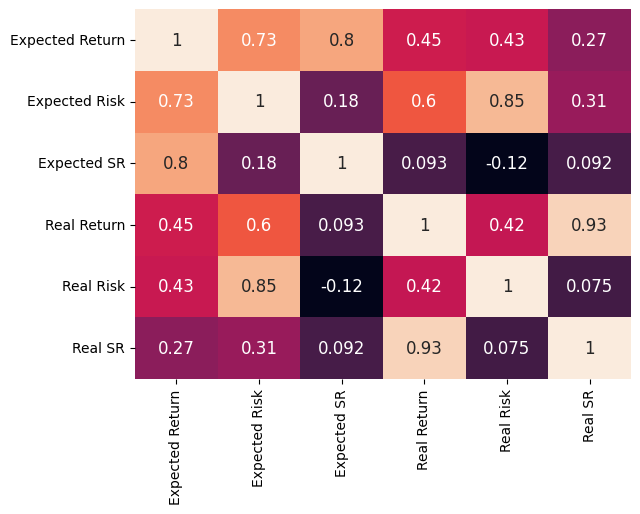

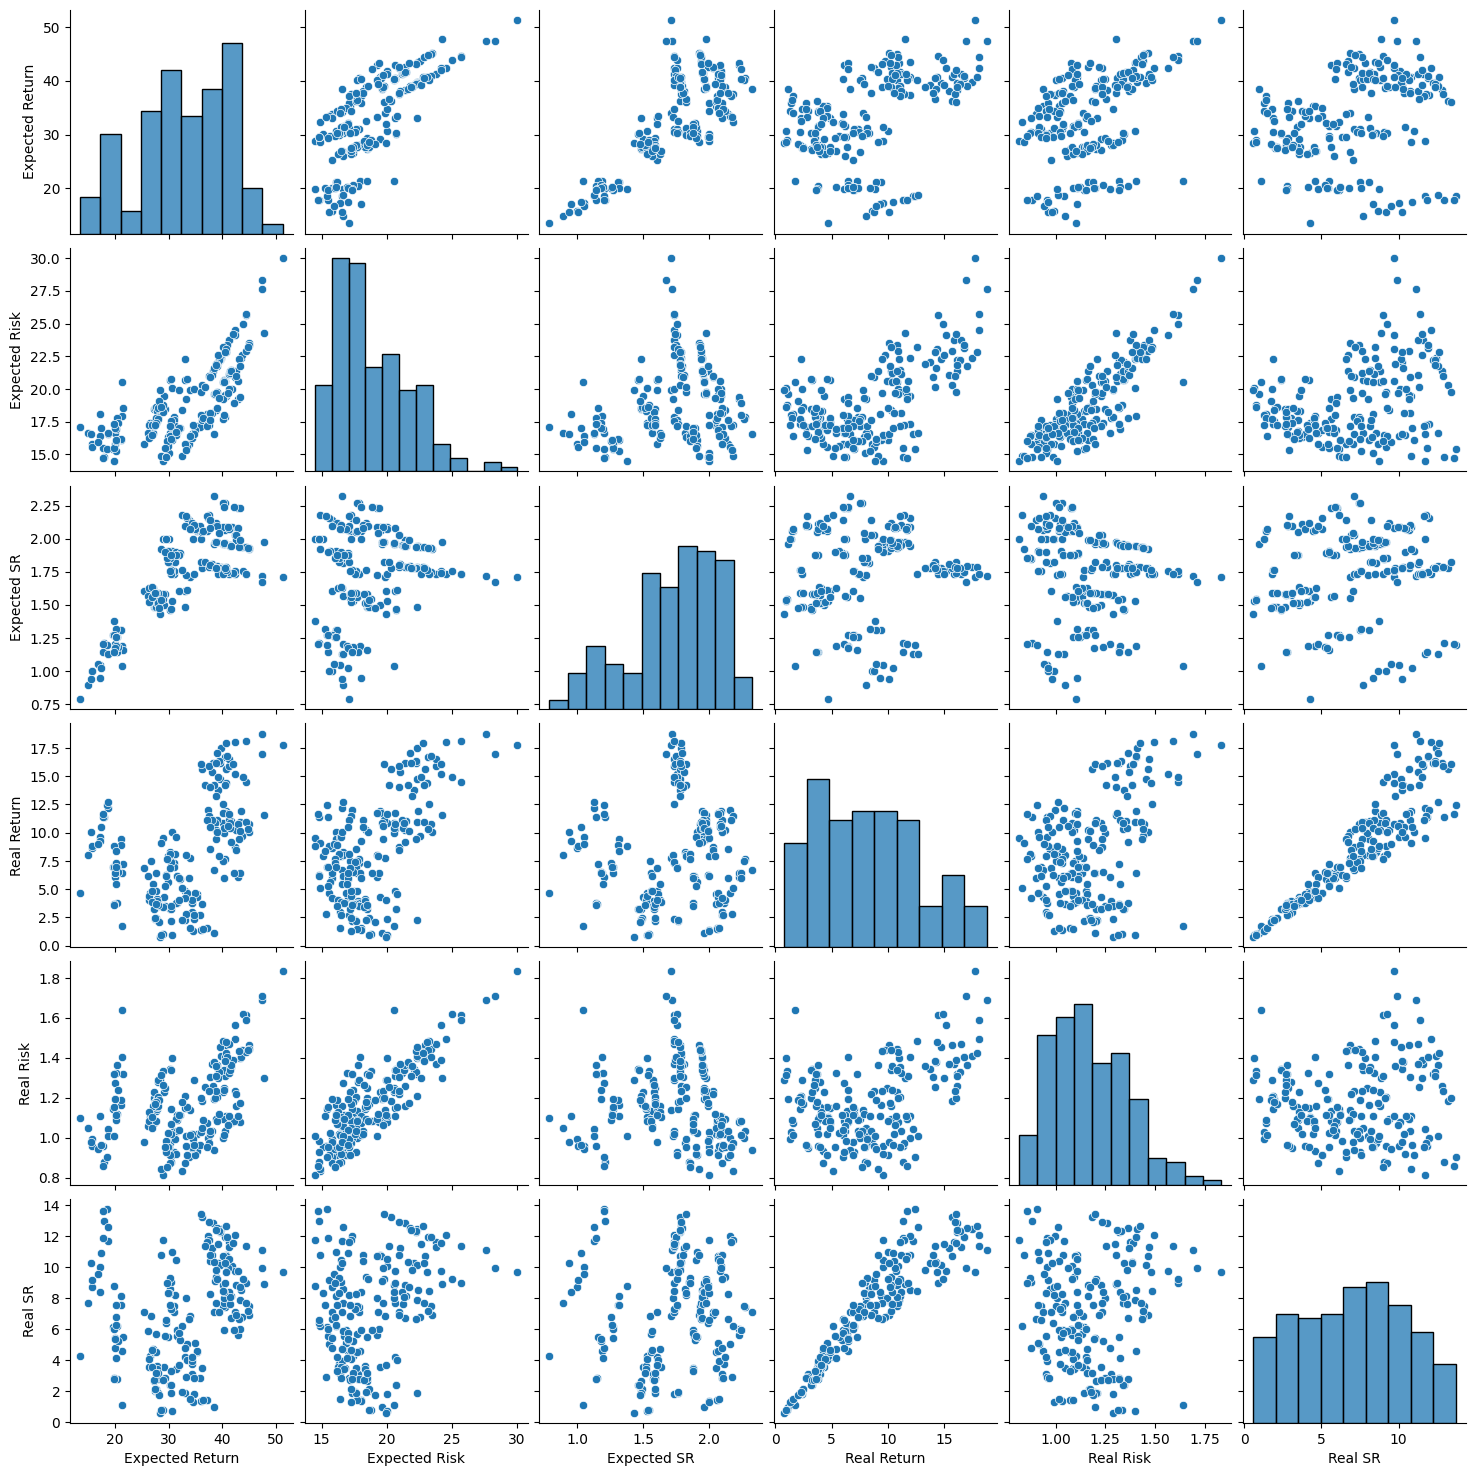

In [ ]:
import seaborn as sns
df = final_dataframe.drop('Number of stocks', axis=1, inplace=False)
sns.heatmap(df.corr("pearson"),
            annot=True,
            annot_kws={'fontsize':12},
            cbar=False)
sns.pairplot(df)
final_dataframe